<div style="background-color: #00FF00; padding: 20px;">
    <p style='text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:black;
              font-size:50px;
              margin: 5px;'> 
        <font color='blue'; size='7'>Brain Tumor Detection</font>
    </p>
    <p style="text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:tomato;
              font-size:30px;
              margin: 10px;">
        Multi Class Classification, with Pretained VGG16 Model
    </p>
</div>

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Project Workflow
</h1>




## Brain Tumor Detection and Classification using VGG16

### 1. Introduction

### 2. Data Preparation

#### 2.1. Downloading the Data

#### 2.2. Splitting the Data

#### 2.3. Data Scaling

### 3. Model Development

#### 3.1. Importing the Pretrained VGG16 Model

#### 3.2. Model Fitting

### 4. Model Evaluation

#### 4.1. Model Metrics

### 5. Model Deployment

#### 5.1. Exporting the Model

#### 5.2. Deploying f you need any further adjustments! if you need any further adjustments!if you need any further adjustments!

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Part-1: Model Building
</h1>

In [1]:
# Import Libraries

from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten # Modified import
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from keras.applications import vgg16
import numpy as np
import random
import os
from tqdm import tqdm
import pickle
import cv2
import matplotlib.pyplot as plt

In [6]:
# Define necessary constants
TEST_DIR = '/content/Brain-Tumor-Classification-DataSet/Testing'
TRAIN_DIR = '/content/Brain-Tumor-Classification-DataSet/Training'
IMG_SIZE = 224
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]


In [7]:
# Creating training dataset
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])

    random.shuffle(training_data)

create_training_data()

X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = [i[1] for i in training_data]

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()



100%|██████████| 827/827 [00:01<00:00, 660.00it/s]


2870
train



In [9]:
# Creating testing dataset
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          testing_data.append([new_array, class_num])

    random.shuffle(testing_data)

create_testing_data()

X_test= np.array([i[0] for i in testing_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test = [i[1] for i in testing_data]

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

100%|██████████| 74/74 [00:00<00:00, 328.52it/s]


394
testing



Model Trainig

In [11]:
tensorboard = TensorBoard(log_dir='./VGG16logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=False)


es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=5)

In [14]:
# Import VGG16 model
vgg16_model = vgg16.VGG16()
vgg16_model.summary()

# Dropping last layers
model = Sequential()
for layer in vgg16_model.layers[:-3]:
    model.add(layer)

for layer in model.layers:
    layer.trainable = True

# Adding last Dense Layer
model.add(Dense(4,activation = 'softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 14,815,044 (56.51 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile model
model.compile(
              loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [16]:
# Scale data
X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [17]:
# Fit Model
history = model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 108s 764ms/step - accuracy: 0.3098 - loss: 1.8414
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 450ms/step - accuracy: 0.5570 - loss: 0.9743
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 449ms/step - accuracy: 0.6891 - loss: 0.7317
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - accuracy: 0.6594 - loss: 0.8058
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 448ms/step - accuracy: 0.7176 - loss: 0.6393
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - accuracy: 0.7725 - loss: 0.5449
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 448ms/step - accuracy: 0.8109 - loss: 0.4760
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - accuracy: 0.8219 - loss: 0.4481
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 448ms/step - accuracy: 0.8400 - loss: 0.3827
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 448ms/step - accuracy: 0.8534 - loss: 0.3782
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 448ms/step - accuracy: 0.8781 - loss: 0.3316
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4

In [18]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 685ms/step - accuracy: 0.7008 - loss: 4.9429
Test loss: 4.660094261169434
Test accuracy: 0.7385786771774292


In [34]:
# Prediction on test data
predictions = model.predict(X_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step


In [37]:
# Calculate prediction accuracy
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(Y_test, predicted_classes)
print(f"Prediction Accuracy: {accuracy:.4f}")

Prediction Accuracy: 0.7386


In [ ]:
# Save Model
model.save("model_VGG16.h5")

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Part-2: Model Deployment
</h1>

In [ ]:
from keras.models import load_model
# Load the trained model
model = load_model('model_VGG16.h5')

# Define the categories corresponding to the labels
CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

def prepare(filepath):
    IMG_SIZE = 224  # Must match the input size of the model
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)  # Read the image
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize the image
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) / 255.0  # Normalize and reshape

def test_image(filepath, actual_class):
    image = prepare(filepath)  # Prepare the image
    prediction = model.predict(image)  # Predict the class
    predicted_class = CATEGORIES[np.argmax(prediction)]  # Get the label of the predicted class
    confidence = np.max(prediction)  # Get the confidence level

    print(f"Actual Class: {actual_class}")
    print(f"Predicted Class: {predicted_class} with confidence {confidence:.4f}")

    # Display the image with the prediction
    img = cv2.imread(filepath)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Actual: {actual_class} | Predicted: {predicted_class} ({confidence:.4f})")
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Actual Class: glioma_tumor
Predicted Class: glioma_tumor with confidence 0.6424


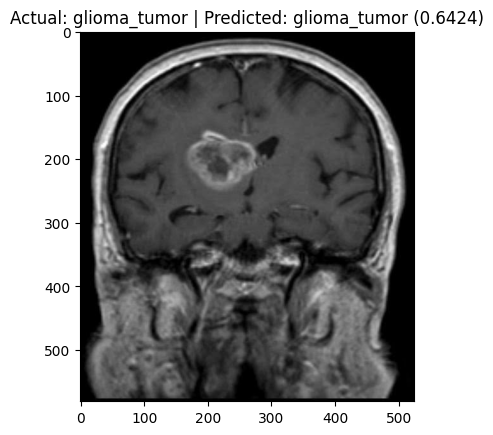

In [28]:
# Test on a new image
# Giloma_tumor
test_image('/content/Brain-Tumor-Classification-DataSet/Testing/glioma_tumor/image(11).jpg','glioma_tumor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual Class: meningioma_tumor
Predicted Class: meningioma_tumor with confidence 0.8500


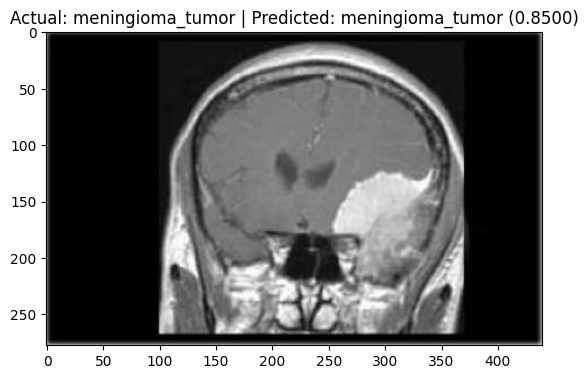

In [29]:
# Test on a new image
# meningioma_tumor
test_image('/content/Brain-Tumor-Classification-DataSet/Testing/meningioma_tumor/image(1).jpg','meningioma_tumor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual Class: no_tumor
Predicted Class: no_tumor with confidence 1.0000


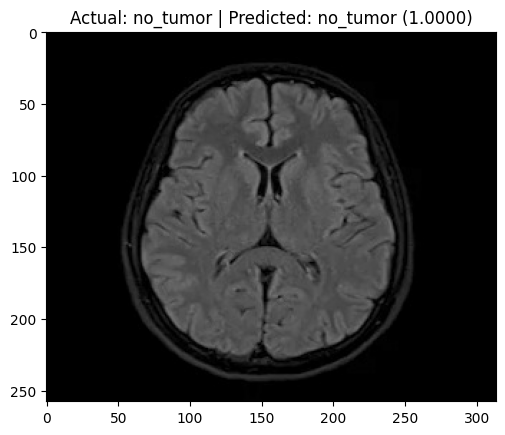

In [31]:
# Test on a new image
# no_tumor
test_image('/content/Brain-Tumor-Classification-DataSet/Testing/no_tumor/image(100).jpg','no_tumor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Actual Class: pituitary_tumor
Predicted Class: pituitary_tumor with confidence 1.0000


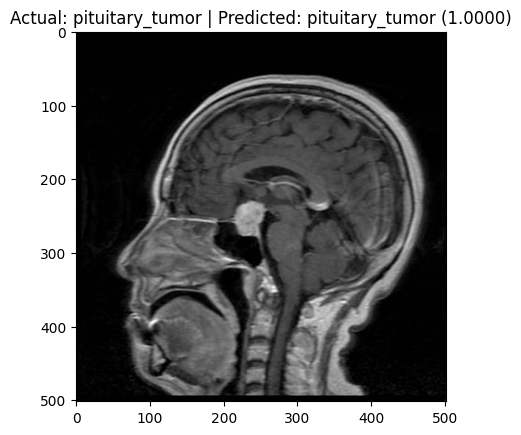

In [33]:
# Test on a new image
# pituitary_tumor
test_image('/content/Brain-Tumor-Classification-DataSet/Testing/pituitary_tumor/image(19).jpg','pituitary_tumor')